# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [2]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [3]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


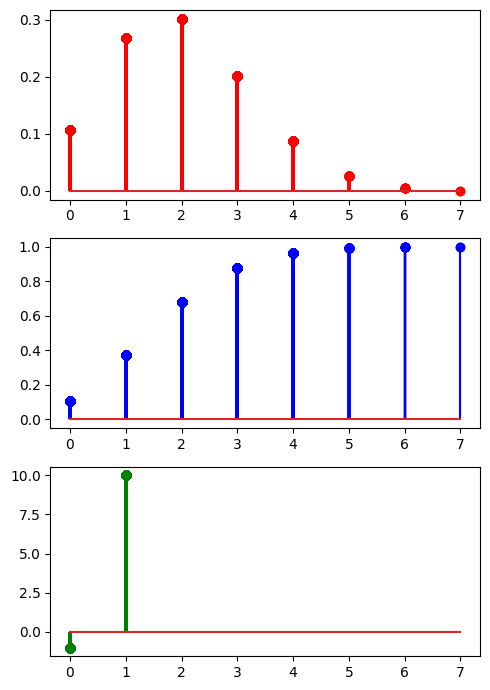

In [4]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

## Distribución Normal: 

In [18]:
# Se importa la librería: 
from scipy.stats import norm


# # # FUNCIONES NECESARIAS # # #

# Función Random Variates - RVS (Generación de los valores de la distribución):
def generate_norm (mean, std, size): 
    distribution = norm.rvs (loc = mean, scale = std, size = size);
    return distribution;

# Función Probability Density Function - PDF:
def pdf_norm (value, mean, std):
    density_norm = norm.pdf(x = value, loc = mean, scale = std);
    return density_norm;

# Función Cumulative Density Funtion - CDF: 
def cdf_norm (value, mean, std):
    cumulative_norm = norm.cdf(x = value, loc = mean, scale = std);
    return cumulative_norm;

# Función Percent Point Function - PPF: 
def ppf_norm (value, mean, std):
    point_norm = norm.ppf(q = value, loc = mean, scale = std);
    return point_norm;


In [6]:
# # # DEFINICIÓN DE DATOS  # # #

# Media: 
mean = 0;

# Desviación Estándar:
std = 1;

# Número de elementos en la distribución:
size = 2000;

In [7]:
# # # EXERCISE APPLICATION # # #

print(f"Probability that a Normal(0, 1) takes the value 2: {pdf_norm(2, mean, std)}");
print(f"Probability that a Normal(0, 1) will take a value less than 2: {cdf_norm(2, mean, std)}");
print(f"Which value of a Normal(0, 1) has a cumulative probability of 0.9? {ppf_norm(0.9, mean, std)}");
print(f"Generate 2000 random values from a Normal(0, 1) distribution: {generate_norm(size, mean, std)}")

Probability that a Normal(0, 1) takes the value 2: 0.05399096651318806
Probability that a Normal(0, 1) will take a value less than 2: 0.9772498680518208
Which value of a Normal(0, 1) has a cumulative probability of 0.9? 1.2815515655446004
Generate 2000 random values from a Normal(0, 1) distribution: [2000.]


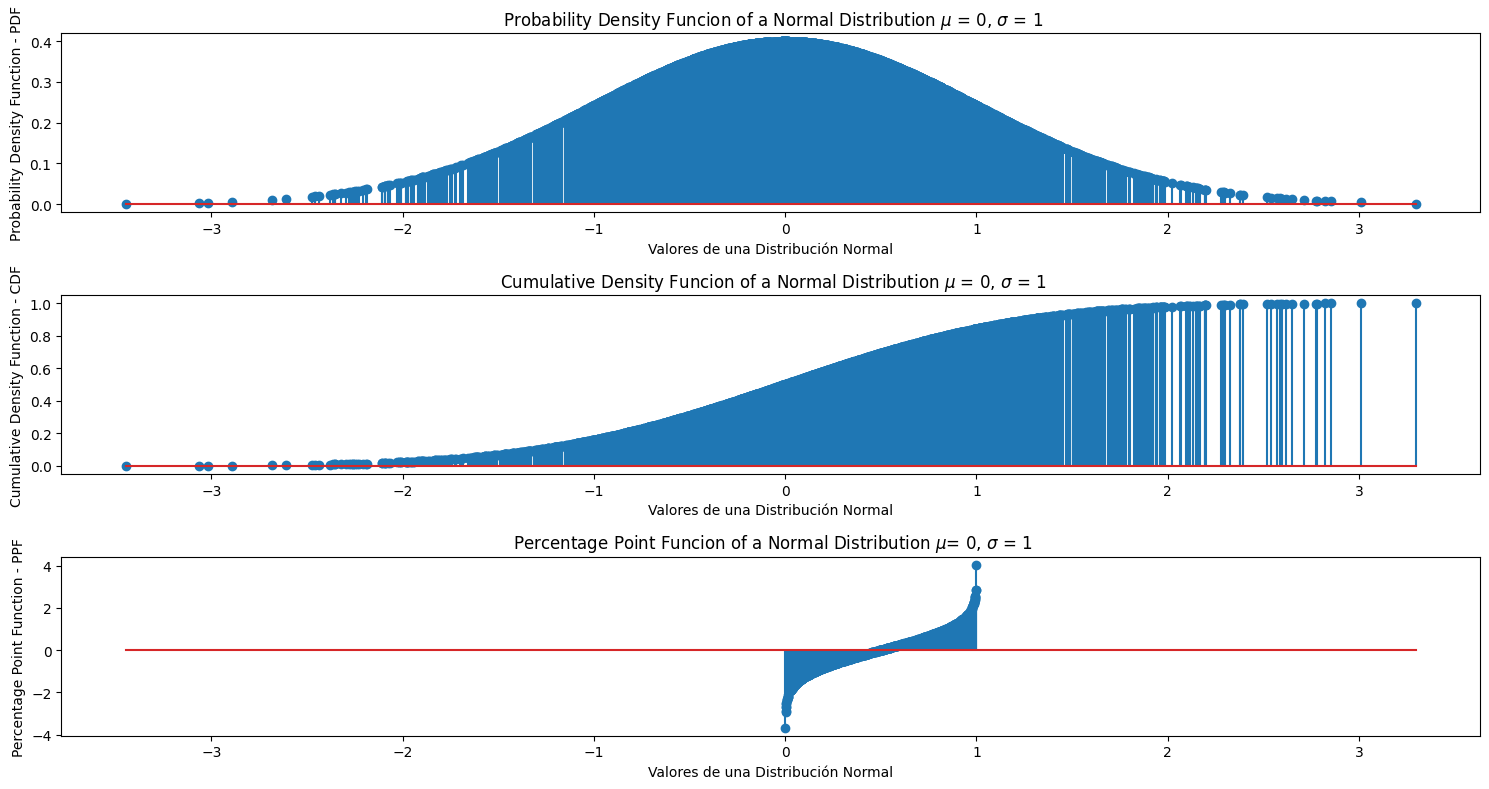

In [ ]:
# # # PLOTS # # #

# Primero se debe generar una distribución normal para la cual poder calcular los parámetros: 
norm_distribution = generate_norm (mean, std, size);

# Se guardan los arrays de cada uno de los parámetros para la distribución obtenida:
pdf_norm_distribution = pdf_norm(norm_distribution, mean, std);
cdf_norm_distribution = cdf_norm(norm_distribution, mean, std);
ppf_norm_distribution = ppf_norm(norm_distribution, mean, std);

plt.figure(figsize = (15, 8));

plt.subplot (3, 1, 1);
plt.stem (norm_distribution, pdf_norm_distribution);
plt.xlabel('Valores de una Distribución Normal');
plt.ylabel('Probability Density Function - PDF');
plt.title (f' Probability Density Funcion of a Normal Distribution $\mu$ = {mean}, $\sigma$ = {std}');


plt.subplot (3, 1, 2);
plt.stem (norm_distribution, cdf_norm_distribution);
plt.xlabel('Valores de una Distribución Normal');
plt.ylabel('Cumulative Density Function - CDF');
plt.title (f' Cumulative Density Funcion of a Normal Distribution $\mu$ = {mean}, $\sigma$ = {std}');


plt.subplot (3, 1, 3);
plt.stem (norm_distribution, ppf_norm_distribution);
plt.xlabel('Valores de una Distribución Normal');
plt.ylabel('Percentage Point Function - PPF');
plt.title (f' Percentage Point Funcion of a Normal Distribution $\mu$= {mean}, $\sigma$ = {std}');

# Adjust the layout
plt.tight_layout();

# Show the plot
plt.show();

##  Distribución Uniforme:

In [ ]:
# Se importa la librería: 
from scipy.stats import uniform


# # # FUNCIONES NECESARIAS # # #

# Función Random Variates - RVS (Generación de los valores de la distribución):
def generate_uni (lower, width, size): 
    distribution = uniform.rvs (loc = lower, scale = width, size = size);
    return distribution;

# Función Probability Density Function - PDF:
def pdf_uniform (value, mean, std):
    density_norm = norm.pdf(x = value, loc = mean, scale = std);
    return density_norm;

# Función Cumulative Density Funtion - CDF: 
def cdf_norm (value, mean, std):
    cumulative_norm = norm.cdf(x = value, loc = mean, scale = std);
    return cumulative_norm;

# Función Percent Point Function - PPF: 
def ppf_norm (value, mean, std):
    point_norm = norm.ppf(q = value, loc = mean, scale = std);
    return point_norm;